### Linear Regression

In [10]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the Dataset
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


<Axes: xlabel='Weight', ylabel='Height'>

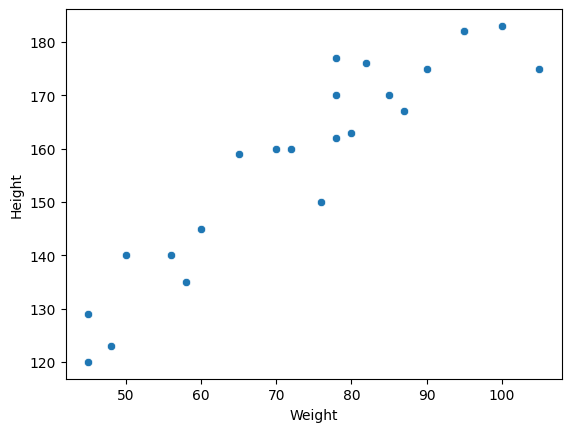

In [12]:
# Checking the Relationship between Height and Weight using Scatter Plot
sns.scatterplot(x='Weight',y='Height',data=df)

In [13]:
# Checking the Relationship between Height and Weight using Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [18]:
# Independent and Dependent Features
X=df[['Weight']] # Independent Feature:It should be a dataframe or a 2D array
X.head()


,Weight
0,45
1,58
2,48
3,60
4,70


In [19]:
Y=df['Height'] # Dependent Feature:It should be a series as only one column is there
print(Y)

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64


In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split


In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [23]:
X_train.shape

(17, 1)

In [24]:
# Standarization
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [27]:
# Applying Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [28]:
lr.fit(X_train,Y_train)

LinearRegression()

In [30]:
print(lr.coef_) # Slope or Beta1 or Theta1

[17.2982057]


In [31]:
print(lr.intercept_) # Slope or Beta0 or Theta0


156.47058823529412


- For one unit increase in the value of weight the height increases by 17.30.
- 156.47 is the Height when the weight is 0.

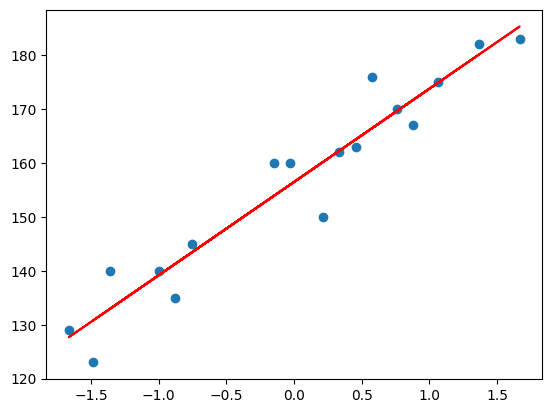

In [36]:
# Plotting Training Data Best Fit Line
plt.scatter(X_train,Y_train)
plt.plot(X_train,lr.predict(X_train),color='red')

Prediction of Test Data
- Y_pred=156.470+17.29(X_test)

In [38]:
# Prediction for Test Data
Y_pred=lr.predict(X_test)
print(Y_pred)

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [39]:
# Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error

In [40]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [43]:
# R Square
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
print(r2)


0.7360826717981276


In [47]:
# Adjusted R Square
1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6701033397476595

Using OLS

In [48]:
import statsmodels.api as sm

In [49]:
model=sm.OLS(Y_train,X_train).fit()

In [51]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [53]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                       0.664
Time:                        16:15:09   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\SaadS\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [58]:
# Prediction for new data
print(lr.predict(sc.transform([[92]])))

[176.93594758]


c:\Users\SaadS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
